In [5]:
import deepsudoku
import os
import gymnasium as gym
import torch
import numpy as np
import matplotlib.pyplot as plt
import tqdm
import deepsudoku.reinforcement_learning
from deepsudoku.reinforcement_learning.ensemble import EnsembleModel
from deepsudoku.reinforcement_learning import agents, evaluate_models
import pandas as pd

import random

random.seed(0)

os.chdir(deepsudoku.REPO_PATH)

In [6]:
agent = agents.get_sudoku_agent()

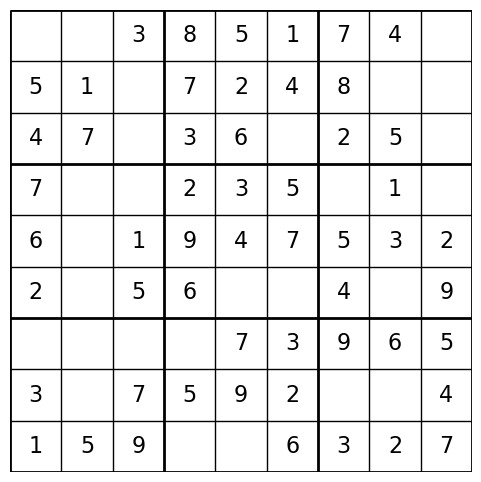

In [7]:
env = gym.make("Sudoku-x2", )
obs,_ = env.reset()
env.render()

In [8]:
# N_GAMES = 10000
# winrate_over_alot = evaluate_models.calculate_winrate(N_GAMES, env, agent)

# series = pd.Series([winrate_over_alot], index = [N_GAMES])
# series.to_json(f"stats/winrate_easy_{N_GAMES}_games.json")

In [9]:
# N_STEPS = 10000

# winrates = []
# x = np.arange(1, 28)

# for missing_digit in x:
#     env = gym.make("Sudoku-x2", upper_bound_missing_digist = missing_digit)
    
#     winrates.append(evaluate_models.calculate_winrate(N_STEPS, env, agent))    
    
# series = pd.Series(winrates, index = x,)
# series.to_json(f"stats/winrate_against_missing_digits_{N_GAMES}_games.json")

In [11]:
N_GAMES = 1000

env = gym.make("Sudoku-x2", )
obs,_ = env.reset()

mode = "average"

settings = [(10,10), (10,20),(10,50)]

df = pd.DataFrame(columns = ["winrate", "n_votes", "n_pertubations"])

for i, (n_votes, n_pertubations) in enumerate(settings):
    
    ensemble_model = EnsembleModel(agent, n_votes,  n_pertubations, n_cpus = 1, mode = mode)
    winrate_over_alot = evaluate_models.calculate_winrate(N_GAMES, env, ensemble_model)
    
    df.loc[i] = [winrate_over_alot, n_votes, n_pertubations]
    
df["mode"] = mode
df["games"] = N_GAMES
# df.to_csv(f"stats/ensemble_{mode}_{N_GAMES}_games.csv")
df

100%|██████████| 1000/1000 [04:20<00:00,  3.84it/s]


,winrate,n_votes,n_pertubations,mode,games
0,0.724,10.0,10.0,average,1000
1,0.738,10.0,20.0,average,1000
2,0.789,10.0,50.0,average,1000


In [13]:
df

,winrate,n_votes,n_pertubations,mode,games
0,0.724,10.0,10.0,average,1000
1,0.738,10.0,20.0,average,1000
2,0.789,10.0,50.0,average,1000


In [12]:
settings = [(20,10),(50,10)]

for i, (n_votes, n_pertubations) in enumerate(settings):
    
    ensemble_model = EnsembleModel(agent, n_votes,  n_pertubations, n_cpus = 1, mode = mode)
    winrate_over_alot = evaluate_models.calculate_winrate(N_GAMES, env, ensemble_model)
    
    df.loc[i+3] = [winrate_over_alot, n_votes, n_pertubations]

100%|██████████| 1000/1000 [01:18<00:00, 12.68it/s]


ValueError: Must have equal len keys and value when setting with an iterable

In [10]:
N_STEPS = 1000

env = gym.make("Sudoku-x2", )
obs,_ = env.reset()

majority_small = EnsembleModel(agent, 5,  10, n_cpus = 1, mode = "majority")


winrates = []
x = np.arange(1, 28)

for missing_digit in x:
    env = gym.make("Sudoku-x2", upper_bound_missing_digist = missing_digit)
    
    winrates.append(evaluate_models.calculate_winrate(N_STEPS, env, majority_small))    
    
series = pd.Series(winrates, index = x,)
series.to_json(f"stats/winrate_against_missing_digits_ensemble_majority_small_{N_GAMES}_games.json")

100%|██████████| 1000/1000 [00:45<00:00, 22.17it/s]


In [ ]:
N_STEPS = 1000

env = gym.make("Sudoku-x2", )
obs,_ = env.reset()

average_big = EnsembleModel(agent, 200,  50, n_cpus = 1, mode = "average")


winrates = []
x = np.arange(1, 28)

for missing_digit in x:
    env = gym.make("Sudoku-x2", upper_bound_missing_digist = missing_digit)
    
    winrates.append(evaluate_models.calculate_winrate(N_STEPS, env, average_big))    
    
series = pd.Series(winrates, index = x,)
series.to_json(f"stats/winrate_against_missing_digits_ensemble_average_big_{N_GAMES}_games.json")

100%|██████████| 10/10 [00:04<00:00,  2.48it/s]


In [ ]:
N_STEPS = 1000

env = gym.make("Sudoku-x2", )
obs,_ = env.reset()

majority_big = EnsembleModel(agent, 200,  50, n_cpus = 1, mode = "majority")


winrates = []
x = np.arange(1, 28)

for missing_digit in x:
    env = gym.make("Sudoku-x2", upper_bound_missing_digist = missing_digit)
    
    winrates.append(evaluate_models.calculate_winrate(N_STEPS, env, majority_big))    
    
series = pd.Series(winrates, index = x,)
series.to_json(f"stats/winrate_against_missing_digits_ensemble_majority_big_{N_GAMES}_games.json")